# Исследование продаж компьютерных игр в  интернет-магазине «Стримчик»

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цель проекта** -  выявить параметры, которые определяют успешность игры и найти закономерности. Также необходимо проверить гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Ход исследования

Данные о продажах представлены в файле /datasets/games.csv. О данных в файле информация не представлена, поэтому необходимо провести обзор данных. Нужно проверить данные на ошибки и оценить их влияние на исследование, их исправить. После обработки данных приступить к выпролнению рассчетов, объединению таблиц, построению графиков и пр.

Таким образом, исследование пройдёт в 5 этапов:

- предобработка данных;
- исследовательский анализ данных;
- составить портрет пользователя каждого региона;
- проверка гипотез;

### Загрузка данных

#### Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

#### Откроем файл с датафреймом

In [2]:
data_games = pd.read_csv('/datasets/games.csv')

#### Рассмотрим датафрейм

In [3]:
# Выведим первые 20 строчек и просмотрим данные
data_games.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


#### Выведим информацию о датафрейме

In [4]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Представление о данных в числах

In [5]:
#Устанавливаем формат отображения чисел с плавающей запятой (float) в два знака.
#Это позволяет отобразить числа с ограниченным числом десятичных знаков для более удобного чтения
pd.options.display.float_format = '{:.2f}'.format
data_games_float = data_games.select_dtypes(include=['float64'])
data_games_float.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


**Вывод:**

- заголовки столбцов имеет некорректный стиль (необходимо перевести в нижний регистр);
- в данных присутствуют пропуски;
- столбец user_score имеет неверным тип данных (object, а должен иметь float), year_of_release должен иметь тип целого числа;
- аномальные значения данных остутствуют.

### Предобработка данных

#### Изменим названия столцов

In [6]:
# Переведем названия в нижний регистр
data_games.columns = data_games.columns.str.lower()

#### Преобразуем типы данных в столбцах

In [7]:
data_games['user_score'] = pd.to_numeric(data_games['user_score'], downcast='float', errors ='coerce')

In [8]:
data_games['year_of_release'] = data_games['year_of_release'].astype('int', errors='ignore') 

In [9]:
# Проверим результат
data_games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float32
rating              object
dtype: object

В столбеце 'year_of_release' тип данных не изменился. Можно произвести округление значений для того, чтобы были только целые значения. 

#### Обработаем пропуски

In [10]:
# Узнаем число пропусков в каждом из столбцов
data_games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Есть 2 пропуска в стобце 'name'. Удалим данные строчки, так как их очень мало и они не повлияют на результат.

Присутствуют пропуски в столбце 'year_of_release'. Можно рассмотреть пропуски и найти возможность заполнить пропуски.

Пропуски в 'critic_score' и 'user_score' невозможно запослнить, так как это индивидуальная оценка каждой игры.

Пропуски в стобеце 'rating' можно заполнить в соответствии с жанром.

In [11]:
# Удалим пропуски по столбцу 'name'
data_games = data_games.dropna(subset=['name'])
# Проверим результат
data_games['name'].isna().sum()

0

In [12]:
# Узнаем название игр, в которых пропущен год издания
data_games[data_games['year_of_release'].isna()]['name'].unique()

array(['Madden NFL 2004', 'FIFA Soccer 2004',
       'LEGO Batman: The Videogame', 'wwe Smackdown vs. Raw 2006',
       'Space Invaders', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog",
       'LEGO Indiana Jones: The Original Adventures', 'Call of Duty 3',
       'Call of Duty: Black Ops', 'Triple Play 99', 'Adventure', 'Combat',
       'LEGO Harry Potter: Years 5-7', 'NASCAR Thunder 2003',
       'Hitman 2: Silent Assassin', 'Legacy of Kain: Soul Reaver',
       'Donkey Kong Land III', 'Air-Sea Battle', 'Suikoden III',
       'Wheel of Fortune', 'Yakuza 4', 'Namco Museum', 'Rhythm Heaven',
       'The Lord of the Rings: War in the North', 'Madden NFL 07',
       'MLB SlugFest 20-03', 'Shaun White Snowboarding',
       'PES 2009: Pro Evolution Soccer', 'WarioWare: Twisted!',
       'Madden NFL 11', 'Test Drive Unlimited 2',
       'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
       'Monster Hunter 2', 'Metal Gear Solid 2: Substance',
       'Advanc

У некоторых игр в названии присутствует год издания. Можно заполнить этим некоторые пропуски.

In [13]:
# Заполним пропуски в столбце 'year_of_release' 
def year_fillna(row):
    '''
    Данная функция заполняет пропуски в стобце 'year_of_release', если год присутствует в названии игры 
    '''   
    if pd.isna(row['year_of_release']):
        for year in range(1980, 2017):
            if str(year) in row['name']:
                return year     
    return row['year_of_release']

# Применяем функцию к столбцу 'year_of_release'
data_games['year_of_release'] = data_games.apply(year_fillna, axis=1)         

In [14]:
data_games = data_games.dropna(subset=['year_of_release'])
data_games['year_of_release'].isna().sum()

0

In [15]:
# Проверим изменения
data_games['year_of_release'].isna().sum()

0

Удалось заполнить несколько пропусков.

Остальные пропуски удалим.

In [18]:
def rating_add(row):
    if pd.isna(row['rating']):
        return 'Неизвестно'
    return row['rating']

data_games['rating'] = data_games.apply(rating_add, axis=1) 
data_games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8466
user_score         8988
rating                0
dtype: int64

In [19]:
data_games['rating'].value_counts()

Неизвестно    6682
E             3930
T             2905
M             1537
E10+          1394
EC               8
K-A              3
AO               1
RP               1
Name: rating, dtype: int64

Аббревиатура 'tbd' в столбце с оценкой пользователей  расшифровывается с на английском как "To be determined", что значит будет определено позже. Можно данное сокращение заминить на пропуски.

In [20]:
data_games['user_score'] = data_games['user_score'].replace('tbd', np.nan)

In [21]:
data_games[data_games['user_score'] == 'tbd']['user_score'].count()

0

#### Обработка дубликатов

In [22]:
data_games.duplicated().sum()

0

Явных дубликатов нет

In [23]:
data_games.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

1

In [24]:
data_games.loc[:, 'name':'year_of_release'] = data_games.loc[:, 'name':'year_of_release'].drop_duplicates()

In [25]:
data_games.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

0

Присутствует неявный дубликат среди имени, платформы и года релиза. Данный дубликат удален.

####  Добавим суммарные продажи во всех регионах в отдельный столбец.

In [26]:
data_games['total_sales'] = data_games.loc[:, 'na_sales':'other_sales'].sum(axis = 1)

In [27]:
data_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Неизвестно,40.24
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Неизвестно,31.38
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Неизвестно,30.26
6,New Super Mario Bros.,DS,2006.00,Platform,11.28,9.14,6.50,2.88,89.00,8.50,E,29.80
7,Wii Play,Wii,2006.00,Misc,13.96,9.18,2.93,2.84,58.00,6.60,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.00,Platform,14.44,6.94,4.70,2.24,87.00,8.40,E,28.32
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Неизвестно,28.31


**Вывод:**

- исправили некорректный тип данных в столбце 'user_score'. Изменить тип в столбце 'year_of_release' не удалось, поэтому округлили значния, чтобы были только целые числа;
- перевели названия столбцов в нижний регистр, чтобы привести к нормальному стилю;
- обработали пропуски в стобцах 'year_of_release' и 'rating'. В столбце 'user_score' заменили 'tbd' на пропуски, так как это одно и тоже;
- удалили неявные дубликаты;
- добавили суммарные продажи во всех регионах в отдельный столбец.
- пропуски могли возникнуть из-за того, что данные взяты из открытых источников. Скорее всего, в данных источниках отсутствует информация по некоторым пунктам.

In [28]:
# Комментарий ревьюера 0
# Посмотрим, что осталось
temp = data_games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16461 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16460 non-null  object 
 1   platform         16460 non-null  object 
 2   year_of_release  16460 non-null  float64
 3   genre            16461 non-null  object 
 4   na_sales         16461 non-null  float64
 5   eu_sales         16461 non-null  float64
 6   jp_sales         16461 non-null  float64
 7   other_sales      16461 non-null  float64
 8   critic_score     7995 non-null   float64
 9   user_score       7473 non-null   float32
 10  rating           16461 non-null  object 
 11  total_sales      16461 non-null  float64
dtypes: float32(1), float64(7), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'wwe Smackdown vs. Raw 2006' '¡Shin Chan Flipa en colores!' nan]
name : кол-во

In [29]:
data_games = data_games.dropna(subset=['name'])

In [30]:
data_games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8466
user_score         8988
rating                0
total_sales           0
dtype: int64

### Исследовательский анализ данных

#### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [31]:
release_year_game_count = data_games.pivot_table(index='year_of_release', values='genre', aggfunc=['count'])
release_year_game_count.columns = ['games_count']
release_year_game_count

,games_count
year_of_release,
1980.00,9
1981.00,46
1982.00,36
1983.00,17
1984.00,14
1985.00,14
1986.00,21
1987.00,16
1988.00,15


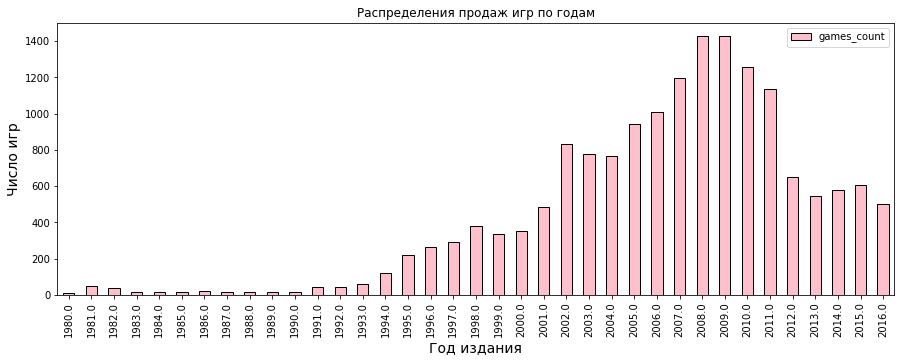

In [32]:
# пострим график для наглядности 
release_year_game_count.plot(kind='bar', figsize=(15, 5), color= 'pink', edgecolor='black')
plt.title('Распределения продаж игр по годам')
plt.xlabel('Год издания', fontsize=14)
plt.ylabel('Число игр', fontsize=14)
plt.show()

**Вывод:** данные за весь период не важны, так как с 1980 по 1995 г.г. число игр очень мало. Рост числа выпусков начинается с 1995г.

#### Посмотрим, как менялись продажи по платформам. За какой характерный срок появляются новые и исчезают старые платформы?

In [33]:
popular_platform = data_games.pivot_table(index='platform', 
                                          values='total_sales', 
                                          aggfunc=['sum'])
popular_platform.columns = ['total_sales']
popular_platform = popular_platform.sort_values('total_sales', ascending=False)
popular_platform

,total_sales
platform,
PS2,1247.28
X360,961.30
PS3,931.33
Wii,891.18
DS,802.79
PS,727.58
PS4,314.14
GBA,312.88
PSP,290.34


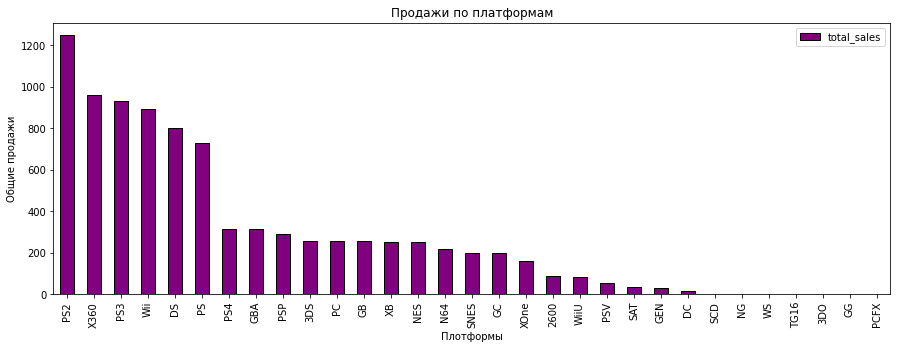

In [34]:
popular_platform.plot(kind='bar', figsize=(15, 5), color='purple', edgecolor='black')
plt.title('Продажи по платформам')
plt.xlabel('Плотформы')
plt.ylabel('Общие продажи')
plt.show()

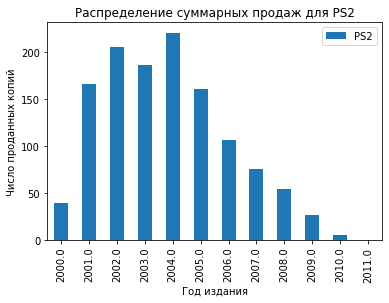

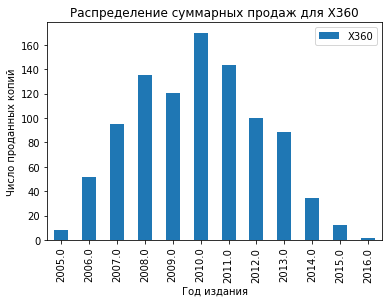

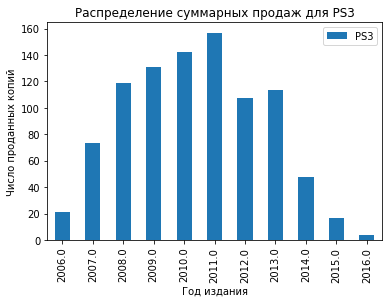

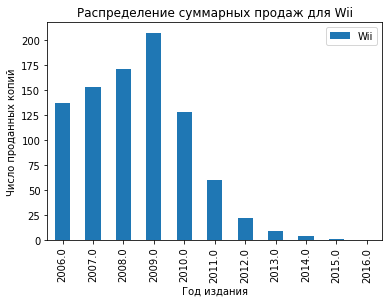

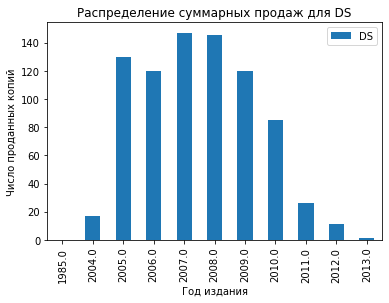

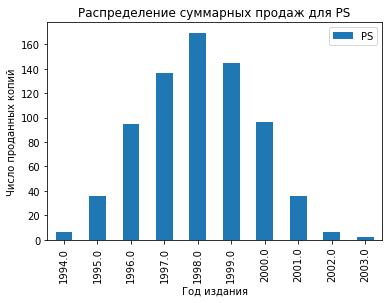

In [35]:
# Запишим топ 6 платформ по продажам
top_platform = ["PS2", 'X360', 'PS3', 'Wii', 'DS', 'PS']

for i in top_platform:
    platform = data_games[data_games['platform']==i]
    platform_piv = platform.pivot_table(index='year_of_release',
                                                values='total_sales',
                                                aggfunc=['sum'])
    platform_piv.plot(kind='bar')
    plt.legend([i])
    plt.xlabel('Год издания')
    plt.ylabel('Число проданных копий')
    plt.title(f'Распределение суммарных продаж для {i}')

В ходе визуализации результатов была найдена ошибка: в 1985г была продана игра на платформу DS. Посмотрим, что это за игра. 

In [36]:
data_games[(data_games['platform'] == 'DS') & (data_games['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985.00,Action,0.00,0.00,0.02,0.00,NaN,NaN,Неизвестно,0.02


In [37]:
# Удалим данную строчку
data_games = data_games.drop(15957)

In [38]:
data_games[(data_games['platform'] == 'DS') & (data_games['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


In [39]:
data_games_life = data_games.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
data_games_life['life'] = data_games_life['max'] - data_games_life['min'] + 1 

data_games_life['life'].median()


7.0

В основном жизненный цикл платформы составляет 7 лет. 

In [40]:
# Комментарий ревьюера 0
temp = data_games.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

#### Возьмите данные за соответствующий актуальный период. Какие платформы лидируют по продажам, растут или падают?

Актуальным периодом можно назвать 2014 по 2016 г.г. Как видно из графика в п 3.1 продажи сильно изменьются спусля 3 года.

In [41]:
actual_data_games = data_games.query('year_of_release > 2013')

In [42]:
actual_data_games_piv = actual_data_games.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc=['sum'])
actual_data_games_piv.columns = ['total_sales']
actual_data_games_piv

total_sales
platform year_of_release             
3DS      2014.00                43.76
         2015.00                27.78
         2016.00                15.14
PC       2014.00                13.28
         2015.00                 8.52
         2016.00                 5.25
PS3      2014.00                47.76
         2015.00                16.82
         2016.00                 3.60
PS4      2014.00               100.00
         2015.00               118.90
         2016.00                69.25
PSP      2014.00                 0.24
         2015.00                 0.12
PSV      2014.00                11.90
         2015.00                 6.25
         2016.00                 4.25
Wii      2014.00                 3.75
         2015.00                 1.14
         2016.00                 0.18
WiiU     2014.00                22.03
         2015.00                16.35
         2016.00                 4.60
X360     2014.00                34.74
         2015.00                11.96
         2016.00                 1.52
XOne     2014.00                54.07
         2015.00                60.14
         2016.00                26.15

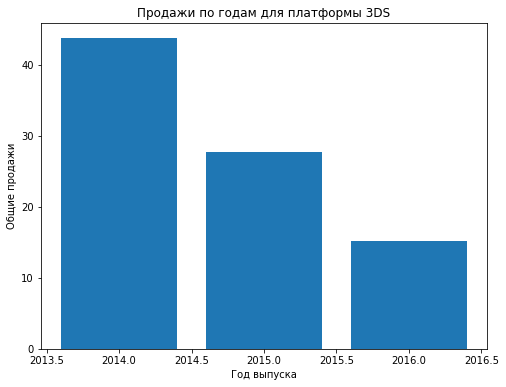

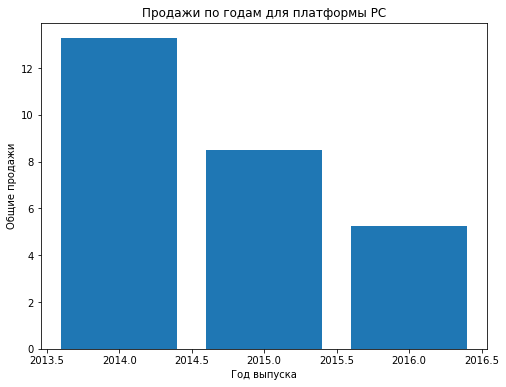

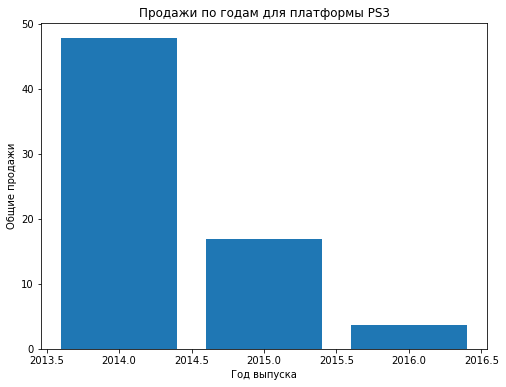

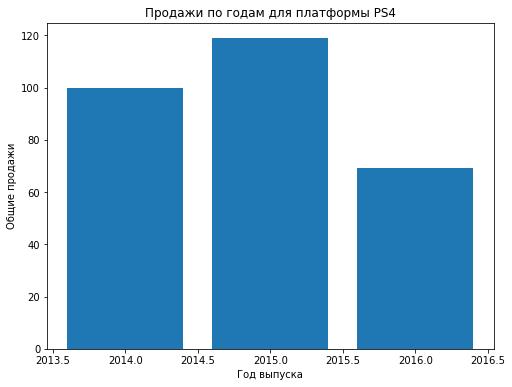

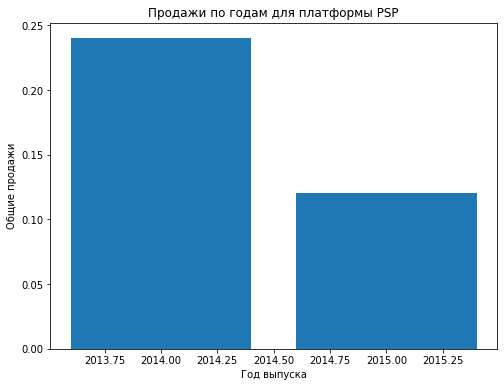

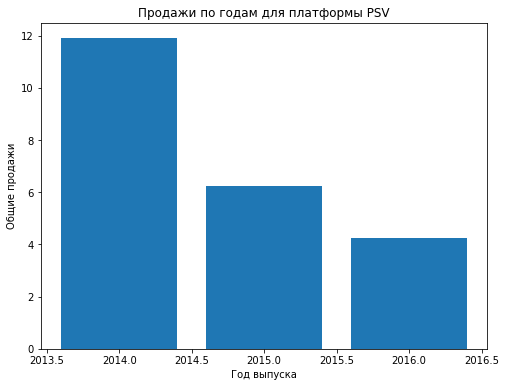

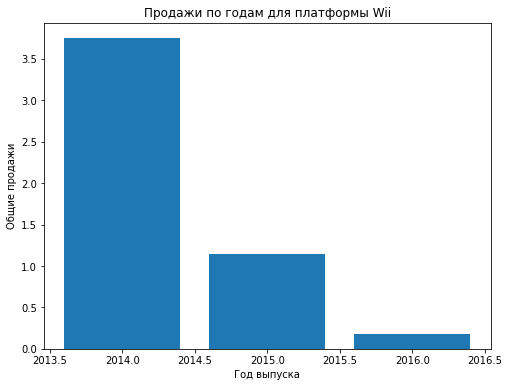

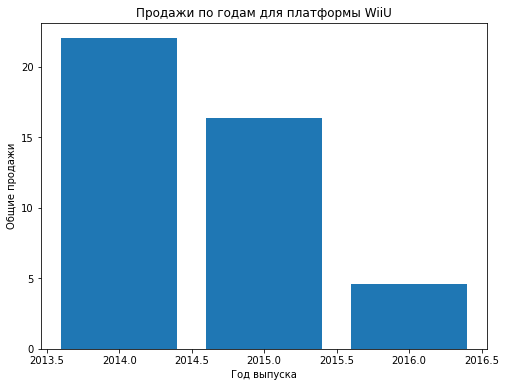

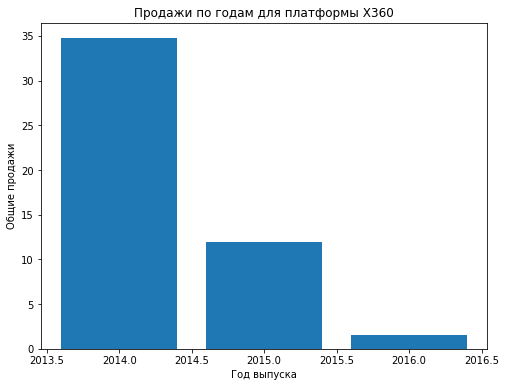

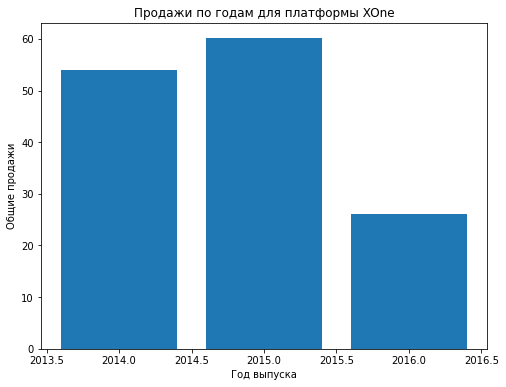

In [43]:
for platform in actual_data_games_piv.index.get_level_values('platform').unique():
    platform_data = actual_data_games_piv.loc[platform]
    plt.figure(figsize=(8, 6))
    plt.bar(platform_data.index.get_level_values('year_of_release'), platform_data['total_sales'])

    plt.xlabel('Год выпуска')
    plt.ylabel('Общие продажи')
    plt.title(f'Продажи по годам для платформы {platform}')


In [44]:
actual_data_games_total_sales = actual_data_games.pivot_table(index='platform', values='total_sales', aggfunc=['sum'])
actual_data_games_total_sales.columns = ['total_sales']
actual_data_games_total_sales.sort_values('total_sales', ascending=False)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


In [45]:
# Выведим уникальные пдатформы в список
unique_values = list(actual_data_games['platform'].unique())
unique_values

['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV', 'PSP']

**Вывод:** лидерами продаж являются PS4, XOne, 3DS и PS3. Растут продажи только у PS4 и XOne, короме 2016 года. Это может быть связоно с тем, что еще не доступна вся отчетность за данный год. У остальных платформ наблюдается спад в продажах. 

Потенциально прибыльными можно назвать PS4 и XOne.

#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

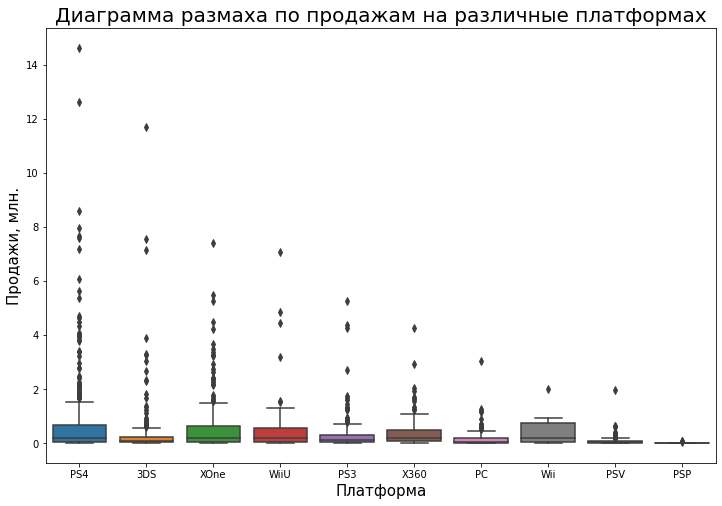

In [46]:
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=actual_data_games,
    x="platform", y="total_sales"
)
plt.title('Диаграмма размаха по продажам на различные платформах', fontsize=20)
plt.xlabel('Платформа', fontsize=15)
plt.ylabel('Продажи, млн.', fontsize=15)
plt.show()

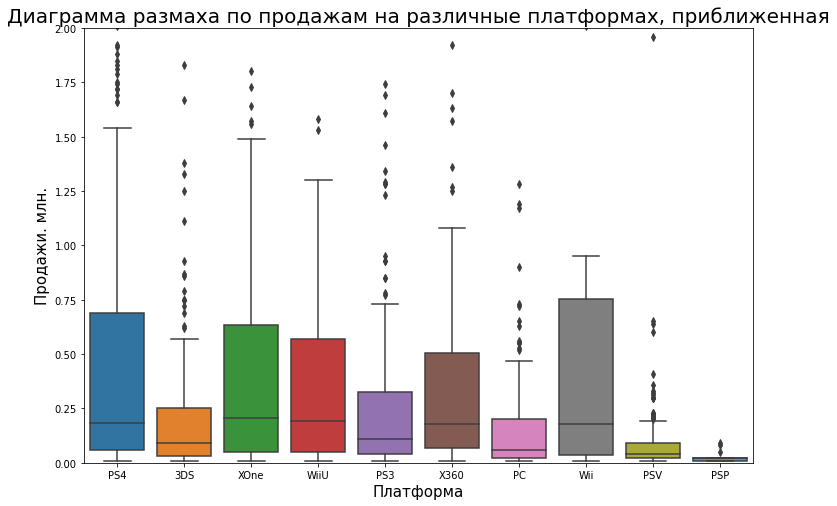

In [47]:
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=actual_data_games,
    x="platform", y="total_sales"
)
plt.title('Диаграмма размаха по продажам на различные платформах, приближенная', fontsize=20)
plt.xlabel('Платформа', fontsize=15)
plt.ylabel('Продажи. млн.', fontsize=15)
plt.ylim(0,2)
plt.show()

**Выводы:**

- у платформ PS4, XOne, WiiU, Will различия между медианой и 75 процентилем практически в 3-4 раза. 
- у тех же платформ, кроме Will, различия медианы и верхней границей практически в 7-8 раз.
- практически у каждой платформы присутствует много выбросов. Наибольшее колчество у PS4.

Это говорит о том, что у описанных платформ много игр, которые продались очень хорошо. Особенно это выделяется на платформе PS4.

In [48]:
# платформы PSP и Wii имеют мало значений. Их можно не использовать
unique_values.remove('PSP') 
unique_values.remove('Wii') 

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.

In [49]:
# Построим для самой популярной платформы - PS4
ps4_score = actual_data_games[actual_data_games['platform']=='PS4'][['user_score', 'critic_score', 'total_sales']]
display(ps4_score.corr())

,user_score,critic_score,total_sales
user_score,1.00,0.55,-0.04
critic_score,0.55,1.00,0.40
total_sales,-0.04,0.40,1.00


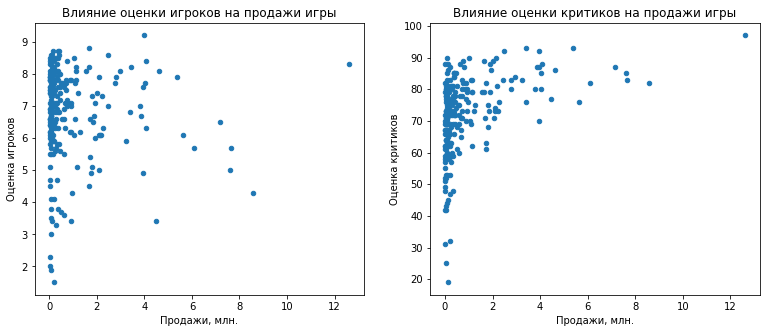

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
ps4_score.plot(kind='scatter', x='total_sales', y='user_score', ax=axes[0])
ps4_score.plot(kind='scatter', x='total_sales', y='critic_score', ax=axes[1])
axes[0].set_title('Влияние оценки игроков на продажи игры')
axes[0].set_ylabel('Оценка игроков')
axes[0].set_xlabel('Продажи, млн.')
axes[1].set_title('Влияние оценки критиков на продажи игры')
axes[1].set_ylabel('Оценка критиков')
axes[1].set_xlabel('Продажи, млн.')
plt.show()

**Вывод:** на продажи игр внутри платформы PS4 влияет рейтинг критиков (0.4), при этом рейтинг от пользователей не оказывает влияние.

#### Соотнесите выводы с продажами игр на других платформах.

____________________________________________________________________________________________________
 
Влияние отзывов пользователей и критиков на платформе 3DS


,user_score,critic_score,total_sales
user_score,1.00,0.86,0.22
critic_score,0.86,1.00,0.31
total_sales,0.22,0.31,1.00


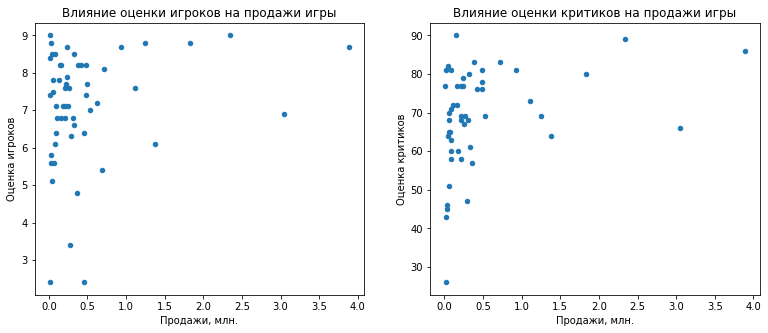

____________________________________________________________________________________________________
 
Влияние отзывов пользователей и критиков на платформе XOne


,user_score,critic_score,total_sales
user_score,1.00,0.44,-0.07
critic_score,0.44,1.00,0.43
total_sales,-0.07,0.43,1.00


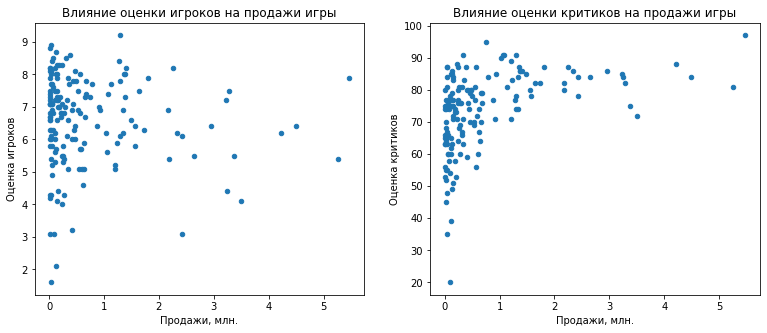

____________________________________________________________________________________________________
 
Влияние отзывов пользователей и критиков на платформе WiiU


,user_score,critic_score,total_sales
user_score,1.00,0.76,0.41
critic_score,0.76,1.00,0.37
total_sales,0.41,0.37,1.00


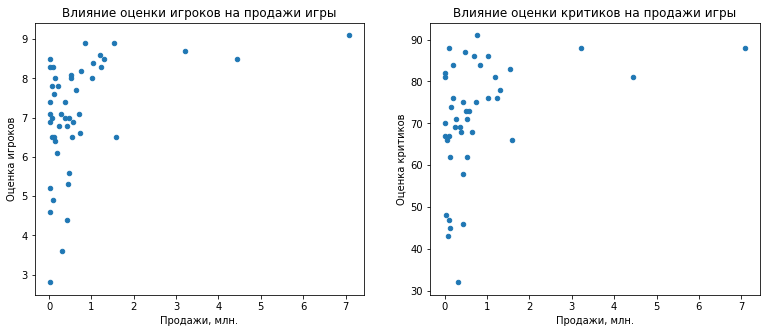

____________________________________________________________________________________________________
 
Влияние отзывов пользователей и критиков на платформе PS3


,user_score,critic_score,total_sales
user_score,1.00,0.69,-0.17
critic_score,0.69,1.00,0.45
total_sales,-0.17,0.45,1.00


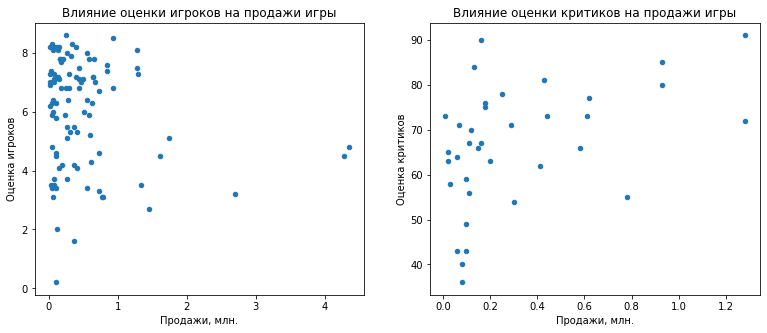

____________________________________________________________________________________________________
 
Влияние отзывов пользователей и критиков на платформе X360


,user_score,critic_score,total_sales
user_score,1.00,0.63,-0.14
critic_score,0.63,1.00,0.53
total_sales,-0.14,0.53,1.00


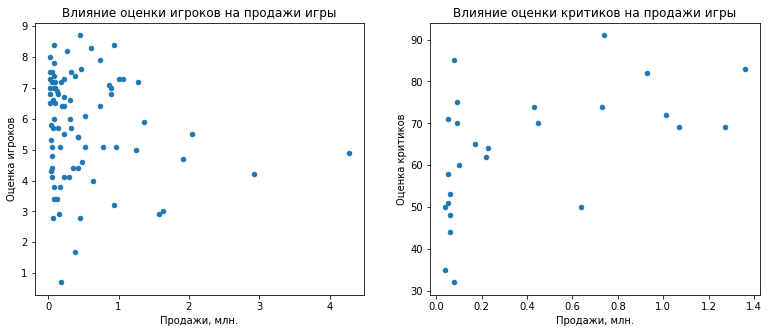

____________________________________________________________________________________________________
 
Влияние отзывов пользователей и критиков на платформе PC


,user_score,critic_score,total_sales
user_score,1.00,0.47,-0.07
critic_score,0.47,1.00,0.17
total_sales,-0.07,0.17,1.00


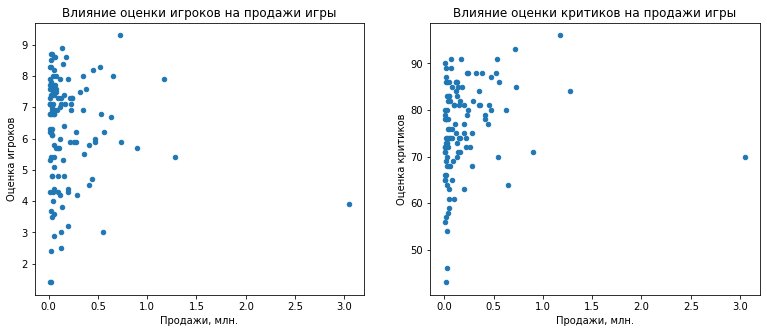

____________________________________________________________________________________________________
 
Влияние отзывов пользователей и критиков на платформе PSV


,user_score,critic_score,total_sales
user_score,1.00,0.52,-0.17
critic_score,0.52,1.00,0.04
total_sales,-0.17,0.04,1.00


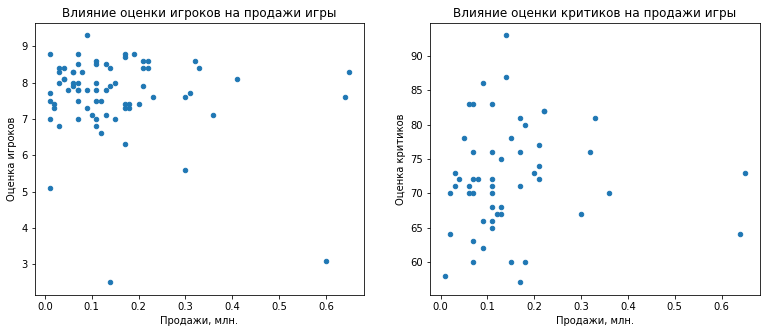

In [51]:
for l in unique_values:
    if l == 'PS4':
        continue
    else: 
        print('_'*100)
        print(' ')
        actual_platform = actual_data_games[actual_data_games['platform']==l][['user_score', 'critic_score', 'total_sales']]
        print(f'Влияние отзывов пользователей и критиков на платформе {l}')
        display(actual_platform.corr())
        fig, axes = plt.subplots(1, 2, figsize=(13, 5))
        actual_platform.plot(kind='scatter', x='total_sales', y='user_score', ax=axes[0])
        actual_platform.plot(kind='scatter', x='total_sales', y='critic_score', ax=axes[1])
        axes[0].set_title('Влияние оценки игроков на продажи игры')
        axes[0].set_ylabel('Оценка игроков')
        axes[0].set_xlabel('Продажи, млн.')
        axes[1].set_title('Влияние оценки критиков на продажи игры')
        axes[1].set_ylabel('Оценка критиков')
        axes[1].set_xlabel('Продажи, млн.')
        plt.show()

**Вывод:**на платформах XOne, PS3, X360 ситуация с влиянием такая же, как и на PS4. На PC, 3DS, PSV примерно одинаковое влияние критиков и игроков, при этом они оказывают незначительное влияние. На платформе WiiU критики и игроки оказывают примерно одинаковое влияние, но немного значительнее, чем на предыдущих платформах.

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [52]:
actual_data_games_genre = actual_data_games.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'count'])
actual_data_games_genre.columns = ['total_sales_sum', 'count']
actual_data_games_genre = actual_data_games_genre.sort_values('total_sales_sum', ascending=False)
actual_data_games_genre

,total_sales_sum,count
genre,,
Action,199.36,619
Shooter,170.94,128
Sports,109.48,161
Role-Playing,101.44,221
Misc,37.55,113
Fighting,28.22,60
Racing,27.52,69
Platform,18.09,38
Adventure,17.55,185


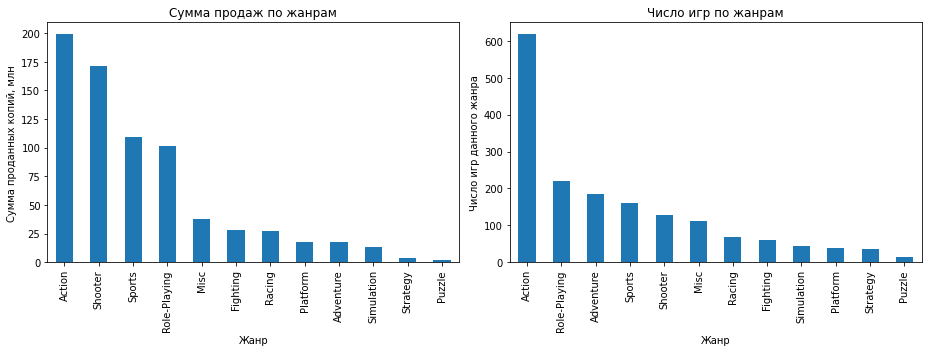

In [53]:
actual_data_games_genre_sort_count = actual_data_games_genre.sort_values('count', ascending=False)
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
actual_data_games_genre['total_sales_sum'].plot(kind='bar', ax=axes[0])
actual_data_games_genre_sort_count['count'].plot(kind='bar', ax=axes[1])
axes[0].set_title('Сумма продаж по жанрам')
axes[0].set_xlabel('Жанр')
axes[0].set_ylabel('Сумма проданных копий, млн')
axes[1].set_title('Число игр по жанрам')
axes[1].set_xlabel('Жанр')
axes[1].set_ylabel('Число игр данного жанра')
plt.tight_layout()

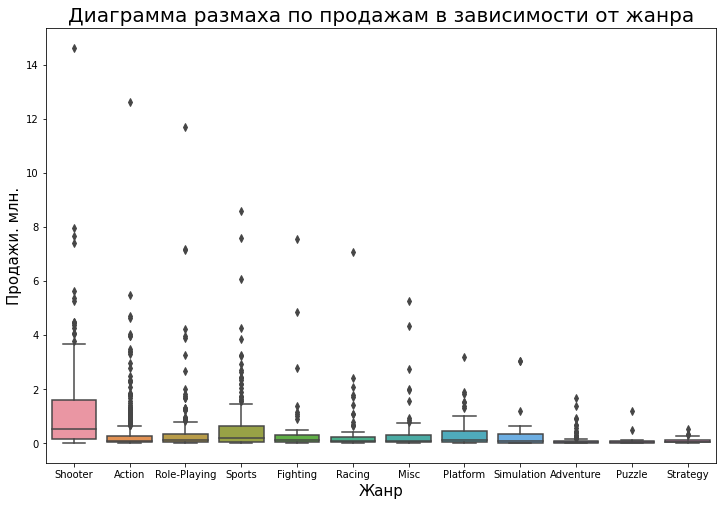

In [54]:
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=actual_data_games,
    x='genre', y='total_sales'
)
plt.title('Диаграмма размаха по продажам в зависимости от жанра', fontsize=20)
plt.xlabel('Жанр', fontsize=15)
plt.ylabel('Продажи. млн.', fontsize=15)
plt.show()

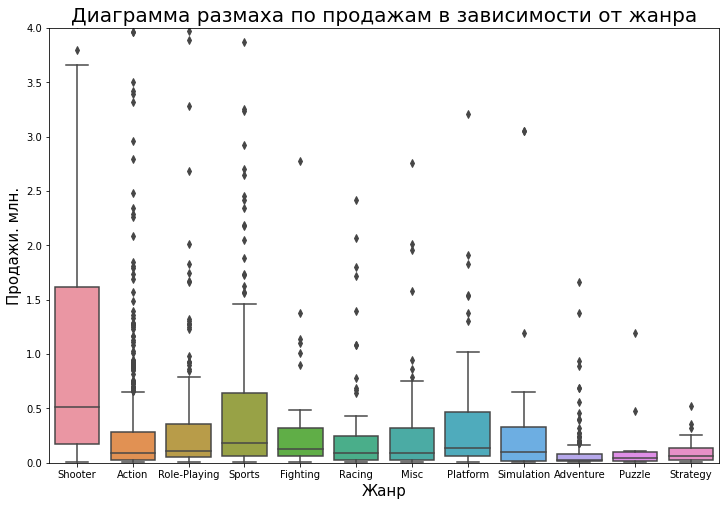

In [55]:
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=actual_data_games,
    x='genre', y='total_sales'
)
plt.title('Диаграмма размаха по продажам в зависимости от жанра', fontsize=20)
plt.xlabel('Жанр', fontsize=15)
plt.ylabel('Продажи. млн.', fontsize=15)
plt.ylim(0,4)
plt.show()

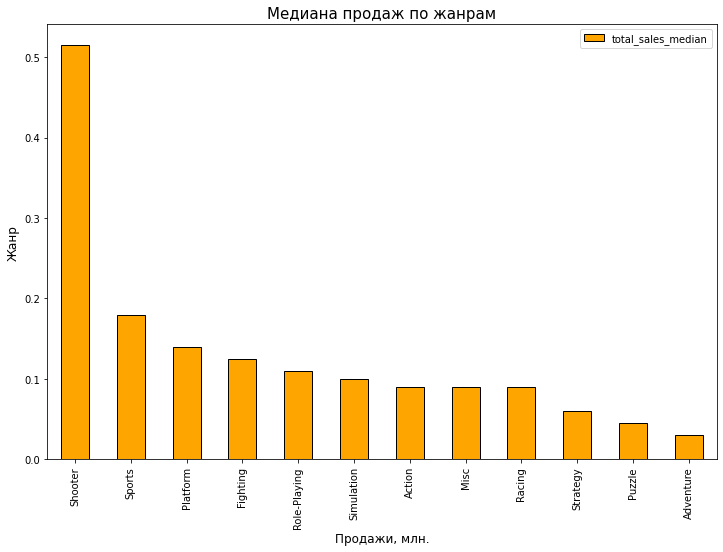

In [56]:
actual_data_games_genre_median = actual_data_games.pivot_table(index='genre', values='total_sales',
                                                               aggfunc=['median'])
actual_data_games_genre_median.columns = ['total_sales_median']
actual_data_games_genre_median = actual_data_games_genre_median.sort_values('total_sales_median', ascending=False)
actual_data_games_genre_median.plot(kind='bar', figsize=(12, 8), color='orange', edgecolor='black')
plt.title('Медиана продаж по жанрам', fontsize=15)
plt.ylabel('Жанр', fontsize=12)
plt.xlabel('Продажи, млн.', fontsize=12)
plt.show()

**Вывод:** наибольшее число проданных копий у жанра Action, но при этом в данном жанре наибольшее число выпущенных игр. Далее идет Shooter. Игры в данном жанре продаются лучше, так как их выходит меньше, но покупают их больше. Затем идеи жанр Spotrs. Такие игры выпускают чаще, чем в жанре Shooter, но продаются они хуже. Самые непопулярные жанры Strategy и Puzzel. Игры в данном жанре выпускают реже всего.

После построения диаграммы размаха и графика можно заметить, что медианные продажи лучше у игр в жанре Shooter и Sports. При этом продажи игр в данном жанре не максимальные как с точки зрения проданных копий, так и с числом выпущенных игр. При этом лидер продаж и по числу выпущенных игр, - Action, - занимает место в середине диаграммы.

Можно сделать вывод, что игры, в жанре Shooter и Sports выпускаются реже, но при этом чаще имеют коммерческий успех. А игры в жанре Action выходят чаще, но при этом, в основном, имеют меньшие продажи. 

### Составим портрет пользователя каждого региона 

#### Самые популярные платформы (топ-5) каждого региона (NA, EU, JP)

In [57]:
def region_stat(region_name, parameter):
    '''
    Данная функция выводит метрики по регионам
    '''
    if region_name == 'na_sales': 
        region = 'Северная Америка'
    elif region_name == 'eu_sales': 
        region = 'Европа'
    elif region_name == 'jp_sales': 
        region = 'Япония' 
    print(f'Параметры по региону {region}')    
    actual_data_games_reg = actual_data_games.pivot_table(index=parameter, values=region_name, aggfunc=['sum'])
    actual_data_games_reg.columns = [region_name] 
    actual_data_games_reg = actual_data_games_reg.sort_values(region_name, ascending=False).head(5)
    actual_data_games_reg['share'] = actual_data_games_reg[region_name] / actual_data_games_reg[region_name].sum()
    display(actual_data_games_reg)
    fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    actual_data_games_reg[region_name].plot(kind='bar', ax=axes[0])
    actual_data_games_reg['share'].plot(kind='pie', autopct = '%1.0f%%', ax=axes[1], normalize=False)
    axes[0].set_title(f'Распределение продаж по региону {region}')
    axes[0].set_ylabel('Продажи', fontsize=12)
    axes[0].set_xlabel('Платформы', fontsize=12)
    axes[1].set_title('Доля продаж')

Параметры по региону Северная Америка


,na_sales,share
platform,,
PS4,98.61,0.39
XOne,81.27,0.32
X360,28.30,0.11
3DS,22.64,0.09
PS3,22.05,0.09


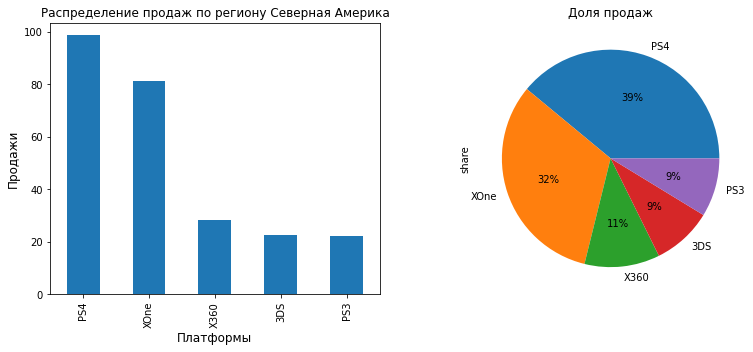

In [58]:
region_stat('na_sales', 'platform')

Параметры по региону Европа


,eu_sales,share
platform,,
PS4,130.04,0.55
XOne,46.25,0.20
PS3,25.54,0.11
PC,17.97,0.08
3DS,16.12,0.07


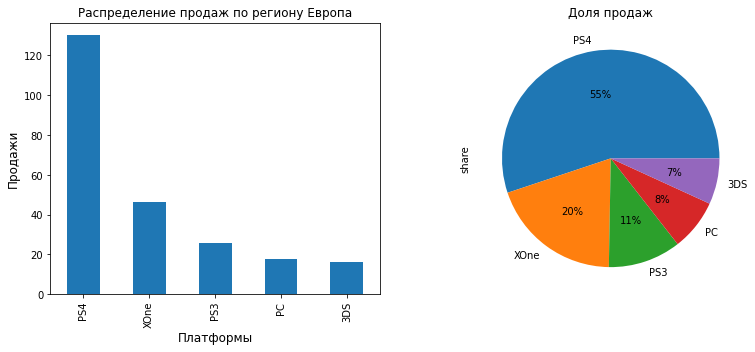

In [59]:
region_stat('eu_sales', 'platform')

Параметры по региону Япония


,jp_sales,share
platform,,
3DS,44.24,0.48
PS4,15.02,0.16
PSV,14.54,0.16
PS3,11.22,0.12
WiiU,7.31,0.08


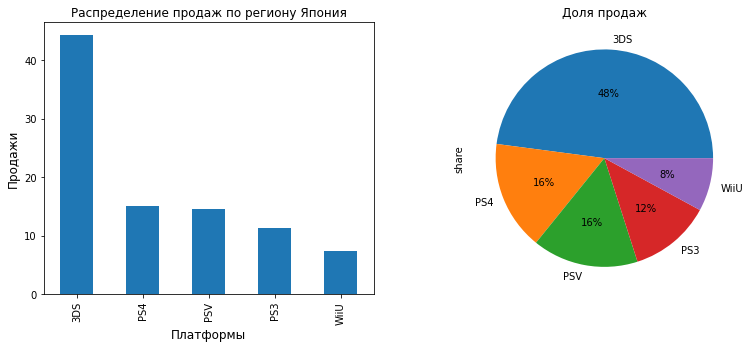

In [60]:
region_stat('jp_sales', 'platform')

**Вывод:**

- В регионе Северная Америка самые популярные платформы PS4, XOne, X360, 3DS, PS3;
- В регионе Европа самые популярные платформы PS4, XOne, PS3, PS, 3DS;
- В регионе Япония самые популярные платформы 3DS, PS4, PSV, PS3, WiiU.
    
- Доля продаж PS4 наибольшая в Европе, затем в Северной Америке, затем в Японии.
- Доля продаж XOne в Северной Америке больше, чем в Европе. При этом он не входит в топ 5 в Японии;
- 3DS - наибольшая доля продаж в Японии. В остальных регионах доля маленькая;
- У остальных платфопм доля продаж в каждом регионе небольшая.

#### Самые популярные жанры (топ-5) по регионам.

Параметры по региону Северная Америка


,na_sales,share
genre,,
Shooter,79.02,0.32
Action,72.53,0.29
Sports,46.13,0.19
Role-Playing,33.47,0.14
Misc,15.05,0.06


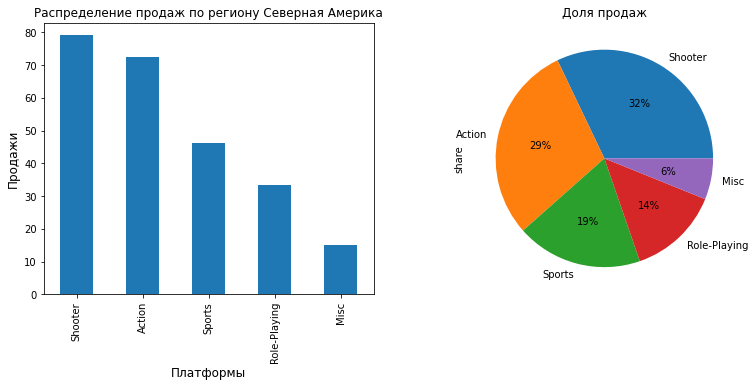

In [61]:
region_stat('na_sales', 'genre')

Параметры по региону Европа


,eu_sales,share
genre,,
Action,74.68,0.33
Shooter,65.52,0.29
Sports,45.73,0.20
Role-Playing,28.17,0.12
Racing,14.13,0.06


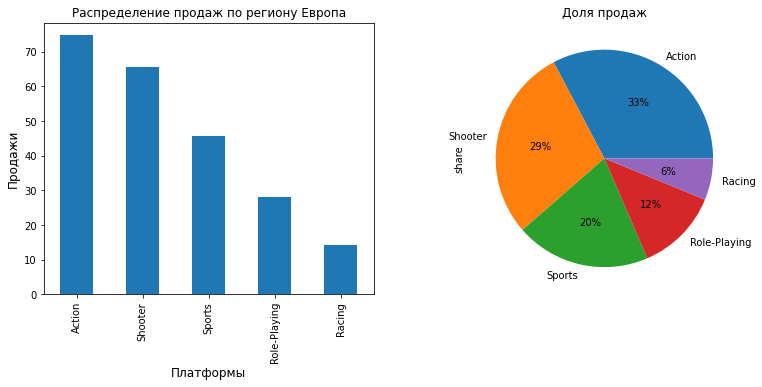

In [62]:
region_stat('eu_sales', 'genre')

Параметры по региону Япония


,jp_sales,share
genre,,
Role-Playing,31.16,0.40
Action,29.58,0.38
Fighting,6.37,0.08
Misc,5.61,0.07
Shooter,4.87,0.06


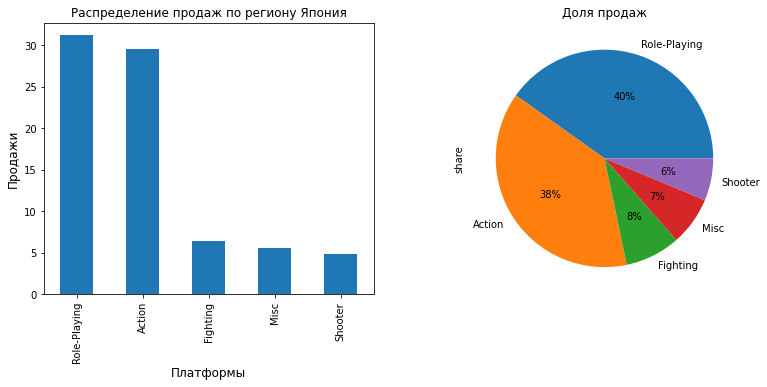

In [63]:
region_stat('jp_sales', 'genre')

**Вывод:**
- Популярные жанры  по Северной Америке: Shooter, Action, Sports, Role-Playing и Misc
- Популярные жанры  по Европейскому региону: Action, Shooter, Sports, Role-Playing и Racing
- Популярные жанры  по Японии: Role-Playing, Action, Fighting, Misc и Shooter

В целом, в регионах Северная Америка и Европа предпочитают примерно одинаковые жанры, за исключением последних, Misc и Racing. В Японии присутствуют жанры, которые в 2-х предыдущих регионах не популярны, особенно выделяется Role-Playing. 

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Параметры по региону Северная Америка


,na_sales,share
rating,,
M,96.42,0.34
Неизвестно,64.72,0.23
E,50.74,0.18
T,38.95,0.14
E10+,33.23,0.12


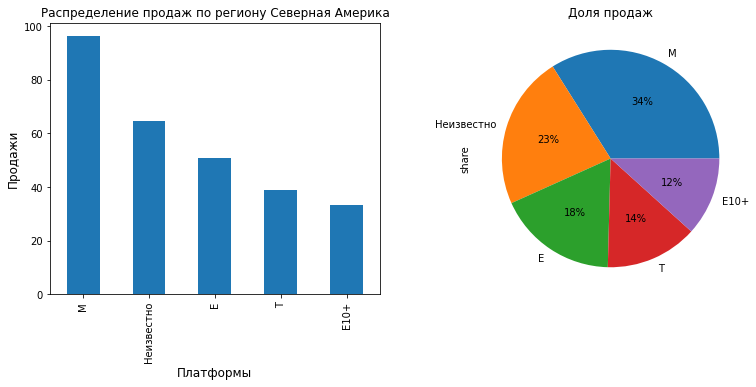

In [64]:
region_stat('na_sales', 'rating')

Параметры по региону Европа


,eu_sales,share
rating,,
M,93.44,0.35
Неизвестно,58.95,0.22
E,58.06,0.21
T,34.07,0.13
E10+,26.16,0.10


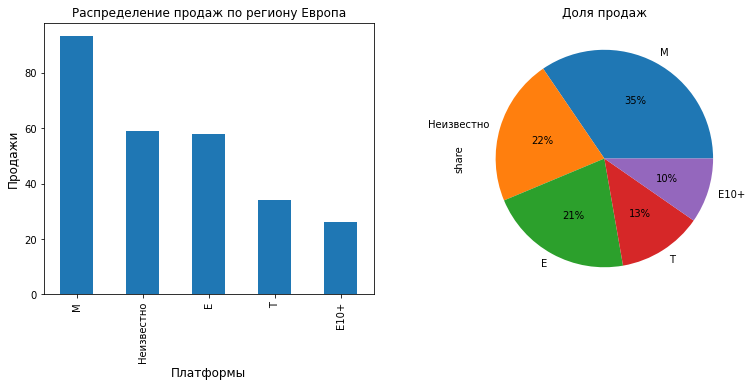

In [65]:
region_stat('eu_sales', 'rating')

Параметры по региону Япония


,jp_sales,share
rating,,
Неизвестно,56.90,0.61
T,14.78,0.16
E,8.94,0.10
M,8.01,0.09
E10+,4.46,0.05


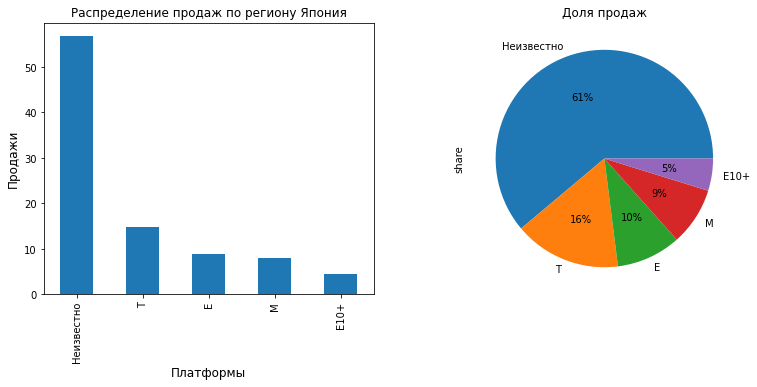

In [66]:
region_stat('jp_sales', 'rating')

Расшифровка рейтинга:
 - E - подходит для всех возрастных категорий. 
 - E10+ - подходит для лиц старше 10 лет. 
 - T - подходит для лиц старше 13 лет. 
 - M - подходит для лиц старше 17 лет. 

**Вывод:**
Рейтинг возраста влияет на продажи в регионах.
В Северной Америке и Европе примерно одинаковое распределение продаж по рейтингу. Самый многочисленный - M. В Японии у большинства игр отсутствует упоминание о возростном рейтинге. Ближайший известный - T.

**Общий вывод:**

    - пользователи в регионе Северная Америка предпочитают играть на PS4 в жанр игр Shooter с ограничением по возрасту M;
    - пользователи в регионе Европа предпочитают играть на PS4 в жанр игр Action с ограничением по возрасту M;
    - пользователи в регионе Япония предпочитают играть на 3DS в жанр игр Role-Playing. Определить, какой возрастной рейтинг нельзя, так как у большинства игр он неизвестен.

### Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

H1: Средние пользовательские рейтинги платформ Xbox One и PC разные.

Необходимо провести двухсторонний t-тест.

In [67]:
xone_score = actual_data_games.query('platform == "XOne"')['user_score']
pc_score = actual_data_games.query('platform == "PC"')['user_score']

xone_score = xone_score.dropna()
pc_score = pc_score.dropna()

results = st.ttest_ind(xone_score, pc_score)

print(f'Средние оценки пользователей на платформе XOne: {xone_score.mean()}')
print(f'Средние оценки пользователей на платформе PC: {pc_score.mean()}')

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средние оценки пользователей на платформе XOne: 6.594544410705566
Средние оценки пользователей на платформе PC: 6.298360824584961
p-значение: 0.10450648833224654
Не получилось отвергнуть нулевую гипотезу


**Вывод:** гипотезу - средние пользовательские рейтинги платформ Xbox One и PC одинаковые - не отвергаем.

#### Средние пользовательские рейтинги жанров Action и Sports  разные.

H0: Средние пользовательские рейтинги жанров Action и Sports  одинаковые;

H1: Средние пользовательские рейтинги жанров Action и Sports  разные.

Необходимо провести двухсторонний t-тест.

In [68]:
action_score = actual_data_games.query('genre == "Action"')['user_score']
sports_score = actual_data_games.query('genre == "Sports"')['user_score']

action_score = action_score.dropna()
sports_score = sports_score.dropna()

results = st.ttest_ind(action_score, sports_score)

print(f'Средние оценки пользователей в жанре Action: {action_score.mean()}')
print(f'Средние оценки пользователей в жанре Sports: {sports_score .mean()}')

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Средние оценки пользователей в жанре Action: 6.760605812072754
Средние оценки пользователей в жанре Sports: 5.225196838378906
p-значение: 2.871146400695882e-19
Отвергаем нулевую гипотезу


**Вывод:** гипотезу - средние пользовательские рейтинги жанров Action и Sports разные - не отвергаем.

**Общий вывод:** для проверки гипотез  использовали t-тест Стьюдента для двух независимых выборок, так как мы сравниваем среднее двух генеральных совокупносте, из каждой из которых вызяты две выборки. Нулеваю гипотезу формуровали  как 'средние значения совокупностей равны'. Альтернативную формулировали как двухстороннию: 'средние значения совокупностей не равны'.

Гипотезу - средние пользовательские рейтинги платформ Xbox One и PC одинаковые - не отвергаем.

Гипотезу - средние пользовательские рейтинги жанров Action и Sports разные - не отвергаем.

### Общий вывод

В превой части проекта была загружена и просмотрена таблица с данными. В ходе первичного осмотра было выявлено:

 - заголовки столбцов имеют неверный стиль;
 - присутствуют пропуски в данных;
 - столбец user_score и year_of_release имеют неверный тип данных.
 - отсутствуют аномальные значения.

Во второй части проекта была проведена предобработка данных, в ходе которой исправили:

 - все заголовки столбцов перевели в нижний регистр;
 - преобразовали тип данных в столбцах user_score и year_of_release. В последнем тип не изменился, но входе просмотра уникальных значений были только целые значения;
 - были обнаружены пропуски в столбцах 'name', 'year_of_release', 'critic_score', 'user_score', 'rating'. Пропуски в столбце 'name' удалили, в 'year_of_release' некоторые обработали, остальные удалили. В 'critic_score', 'user_score' невозможно обработать пропуски, так как каждое значение уникальное. В 'rating' заменили пропуски на 'Неизвестно'.
 - в столбце 'user_score' были значения 'tbd', что означает определено позже. Данные значения заменили на пропуски.
 - добавили столбец 'total_sum' с суммой продаж по всем регионам для каждой игры.
 
В третьей части провели исследовательский анализ и выяснили следующее:

 -  можно не учитывать данные за весь период, так как с 1980 по 1995 г.г. число  игр очень мало. Рост числа выпусков начинается с 1995г.
 - Наибольшие общие продажи у платформы PS2 (1247,28 млн), затем у X360 (961,3 млн), затем у PS3 (931,33 млн). Определили медианный срок жизни платформы - 7 лет.
 - Взяли данные за актуальный период (2014-2016гг). Лидерами продаж за данный период являются PS4, XOne, 3DS и PS3. Растут продажи только у PS4 и XOne, короме 2016 года. Это может быть связоно с тем, что еще не доступна вся отчетность за данный год. У остальных платформ наблюдается спад в продажах.
 - Построили диаграммы размаха и выяснили, что у платформ PS4, XOne, WiiU, Will  стабильно высокие продажи за актуальныей период.
 -  На продажи игр внутри платформы PS4 влияет рейтинг критиков, при этом рейтинг от пользователей не оказывает влияние.
 - на платформах XOne, PS3, X360 ситуация с влиянием такая же, как и на PS4. На PC, 3DS, PSV примерно одинаковое влияние критиков и игроков, при этом они оказывают незначительное влияние. На платформе WiiU критики и игроки оказывают примерно одинаковое влияние, но немного значительнее, чем на предыдущих платформах.
 - Самые прибыльные жанры - Shooter и Sports. Их медианные продажи выше других жанров, при этом они чаще имеют коммерческий успех.

С четвертой части составили портрет пользователя для каждого региона:

    - Северная Америка:
    
        - платформа для издания игры - PS4, XOne;
        - жанр игры Action или Shooter;
        - категория игроков - взрослые.
        
    - Европа
    
        - платформа для издания игры - PS4, XOne;
        - жанр игры Action или Shooter;
        - категория игроков - взрослые.
        
    - Япония
    
        - платформа для издания игры - 3DS, PS4;
        - жанр игры Action или Role-Playing;
        - категория игроков - подростки.
        
В пятой части проверили выдвинутые гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - не отвергаетя;
- средние пользовательские рейтинги жанров Action и Sports разные - не отвергается.

Наиболее прибыльные регионы по убыванию: Северная Америка, Европа, Япония.

Потенциально прибылиными игры можно назвать те, которые выходят на платформах PS4, XOne и 3DS (для Японии), в жанре Action или Shooter для Европы и Северной Америке и в жанре Role-Playing или Action для Японии, имеющие возрастной рейтиг M для Северной Америке и Европы, для Японии рейтинг определить нельзя, так как большинство значений неизвестно, ближайшее известное значение - T.